In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./merged_all_count.csv")

In [3]:
df

,chrom,start,end,Fresh,Fix,HexFix
0,chr10,3117593,3117993,44,10,10
1,chr10,3172364,3172764,23,13,11
2,chr10,3172903,3173303,72,28,18
3,chr10,3181097,3181497,15,12,8
4,chr10,3191617,3192017,20,10,4
...,...,...,...,...,...,...
68804,chrY,90807654,90808054,94,58,40
68805,chrY,90808489,90808889,92,23,34
68806,chrY,90810605,90811005,83,33,28
68807,chrY,90825230,90825630,42,6,17


In [4]:
df.isnull().sum()

chrom     0
start     0
end       0
Fresh     0
Fix       0
HexFix    0
dtype: int64

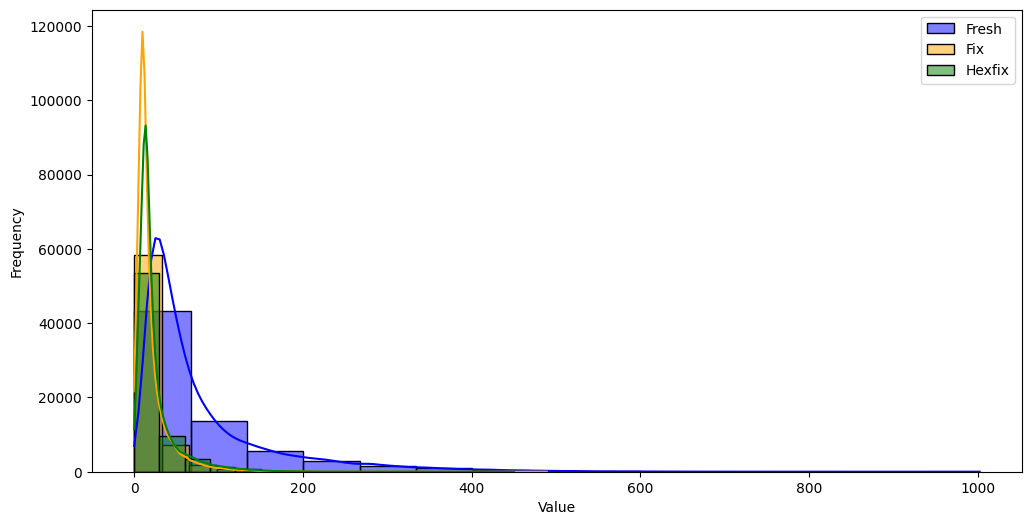

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Fresh'], kde=True, label='Fresh', color='blue', bins=15)
sns.histplot(df['Fix'], kde=True, label='Fix', color='orange', bins=15)
sns.histplot(df['HexFix'], kde=True, label='Hexfix', color='green', bins=15)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

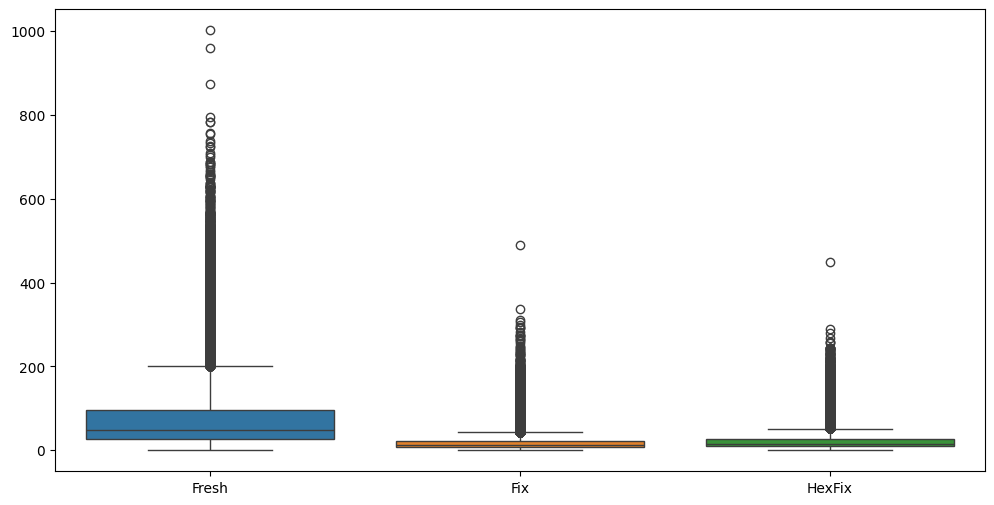

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Fresh', 'Fix', 'HexFix']])
plt.show()

In [7]:
df['Log_Fresh'] = np.log(df['Fresh'] + 1)
df['Log_Fix'] = np.log(df['Fix'] + 1)
df['Log_HexFix'] = np.log(df['HexFix'] + 1)

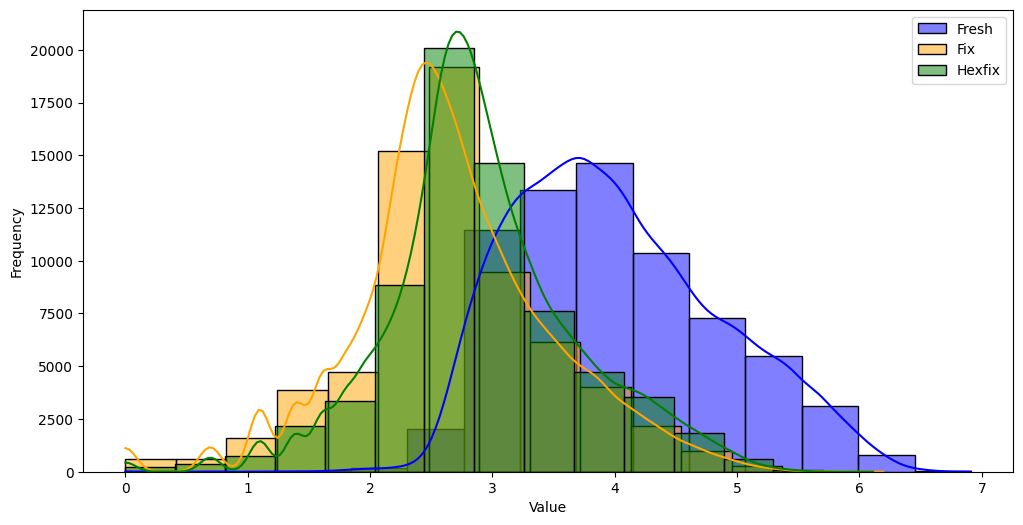

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Log_Fresh'], kde=True, label='Fresh', color='blue', bins=15)
sns.histplot(df['Log_Fix'], kde=True, label='Fix', color='orange', bins=15)
sns.histplot(df['Log_HexFix'], kde=True, label='Hexfix', color='green', bins=15)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

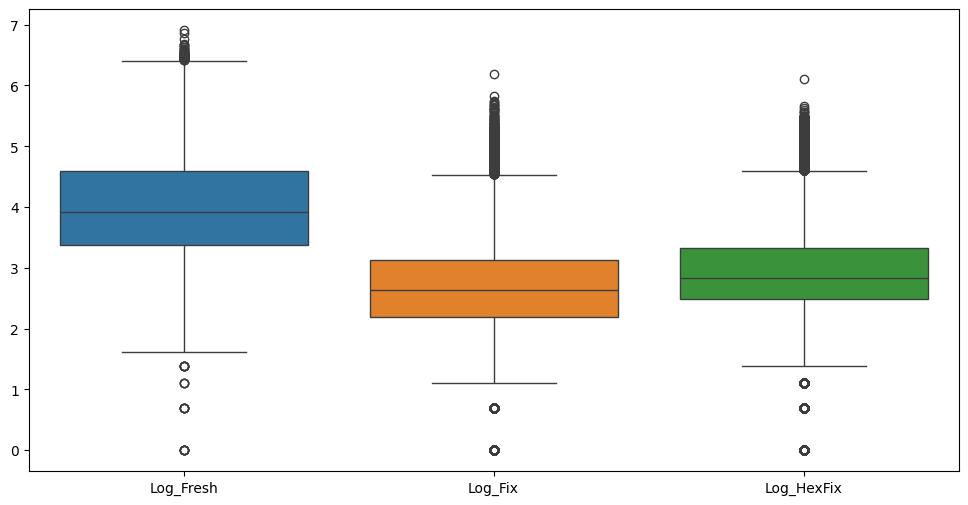

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Log_Fresh', 'Log_Fix', 'Log_HexFix']])
plt.show()

In [10]:
df

,chrom,start,end,Fresh,Fix,HexFix,Log_Fresh,Log_Fix,Log_HexFix
0,chr10,3117593,3117993,44,10,10,3.806662,2.397895,2.397895
1,chr10,3172364,3172764,23,13,11,3.178054,2.639057,2.484907
2,chr10,3172903,3173303,72,28,18,4.290459,3.367296,2.944439
3,chr10,3181097,3181497,15,12,8,2.772589,2.564949,2.197225
4,chr10,3191617,3192017,20,10,4,3.044522,2.397895,1.609438
...,...,...,...,...,...,...,...,...,...
68804,chrY,90807654,90808054,94,58,40,4.553877,4.077537,3.713572
68805,chrY,90808489,90808889,92,23,34,4.532599,3.178054,3.555348
68806,chrY,90810605,90811005,83,33,28,4.430817,3.526361,3.367296
68807,chrY,90825230,90825630,42,6,17,3.761200,1.945910,2.890372


In [11]:
Fresh_median = df['Log_Fresh'].median()
Fix_median = df['Log_Fix'].median()
HexFix_median = df['Log_HexFix'].median()
median_mean = (Fresh_median + Fix_median + HexFix_median) / 3

df['Normalized_Fresh'] = df['Log_Fresh'] / Fresh_median * median_mean
df['Normalized_Fix'] = df['Log_Fix'] / Fix_median * median_mean
df['Normalized_HexFix'] = df['Log_HexFix'] / HexFix_median * median_mean

In [12]:
df

,chrom,start,end,Fresh,Fix,HexFix,Log_Fresh,Log_Fix,Log_HexFix,Normalized_Fresh,Normalized_Fix,Normalized_HexFix
0,chr10,3117593,3117993,44,10,10,3.806662,2.397895,2.397895,3.043850,2.842246,2.647471
1,chr10,3172364,3172764,23,13,11,3.178054,2.639057,2.484907,2.541208,3.128098,2.743539
2,chr10,3172903,3173303,72,28,18,4.290459,3.367296,2.944439,3.430700,3.991285,3.250900
3,chr10,3181097,3181497,15,12,8,2.772589,2.564949,2.197225,2.216993,3.040257,2.425915
4,chr10,3191617,3192017,20,10,4,3.044522,2.397895,1.609438,2.434435,2.842246,1.776950
...,...,...,...,...,...,...,...,...,...,...,...,...
68804,chrY,90807654,90808054,94,58,40,4.553877,4.077537,3.713572,3.641332,4.833141,4.100086
68805,chrY,90808489,90808889,92,23,34,4.532599,3.178054,3.555348,3.624318,3.766975,3.925393
68806,chrY,90810605,90811005,83,33,28,4.430817,3.526361,3.367296,3.542931,4.179826,3.717768
68807,chrY,90825230,90825630,42,6,17,3.761200,1.945910,2.890372,3.007498,2.306504,3.191205


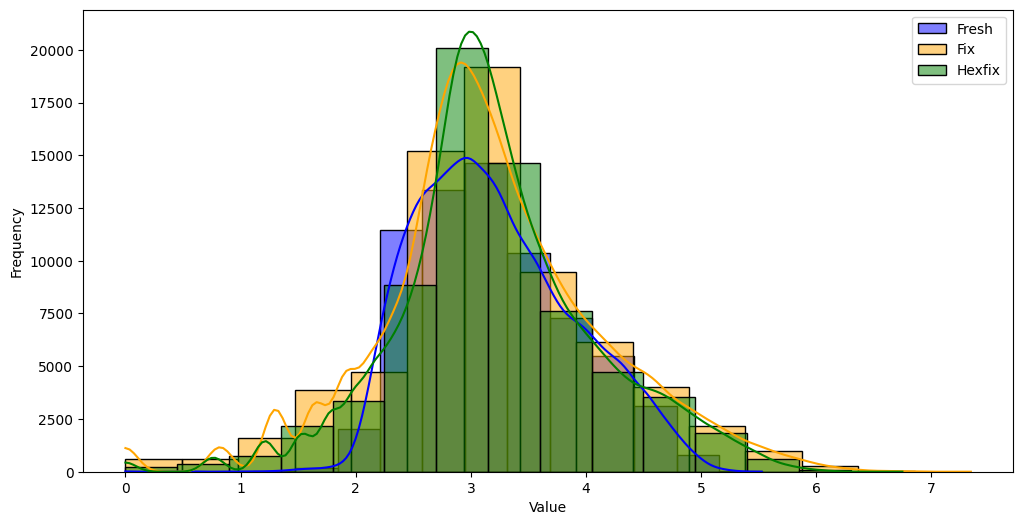

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Normalized_Fresh'], kde=True, label='Fresh', color='blue', bins=15)
sns.histplot(df['Normalized_Fix'], kde=True, label='Fix', color='orange', bins=15)
sns.histplot(df['Normalized_HexFix'], kde=True, label='Hexfix', color='green', bins=15)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

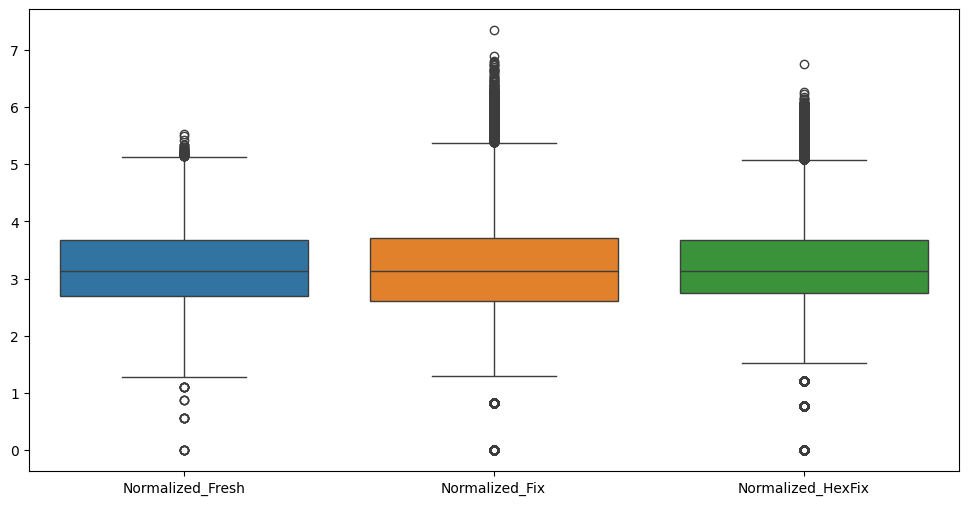

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Normalized_Fresh', 'Normalized_Fix', 'Normalized_HexFix']])
plt.show()

In [15]:
df_normalized = df[['chrom', 'start', 'end', 'Normalized_Fresh', 'Normalized_Fix', 'Normalized_HexFix']]
df_normalized.columns = ['chrom', 'start', 'end', 'Fresh', 'Fix', 'HexFix']

In [16]:
df_normalized

,chrom,start,end,Fresh,Fix,HexFix
0,chr10,3117593,3117993,3.043850,2.842246,2.647471
1,chr10,3172364,3172764,2.541208,3.128098,2.743539
2,chr10,3172903,3173303,3.430700,3.991285,3.250900
3,chr10,3181097,3181497,2.216993,3.040257,2.425915
4,chr10,3191617,3192017,2.434435,2.842246,1.776950
...,...,...,...,...,...,...
68804,chrY,90807654,90808054,3.641332,4.833141,4.100086
68805,chrY,90808489,90808889,3.624318,3.766975,3.925393
68806,chrY,90810605,90811005,3.542931,4.179826,3.717768
68807,chrY,90825230,90825630,3.007498,2.306504,3.191205


In [17]:
df_normalized.to_csv("merge_all_normalized.csv", index=False)